#<font color='#d25a5a'> **Support Vector Machine to detect malicious URLs** ☠ ☠


* <font color='#e3a3b2'> **INTRODUCTION:**   

  A malicious web site is a common and big risk of cybersecurity. Many malicious URLs present unsought content (spam, fraud, phishing, drive-by exploits and many more.) and attract unsuspecting internet users to be victims of frauds and scams (money laundry, stealing personal information, and installation of malware), and cause damage of billions of dollars each year. it's crucial to discover and take action on such threats promptly.
     
  *  <font color='#e3a3b2'>**SOLUTION:**💡

   ▶  To solve the above drawbacks we've worked on a system that will detect malicious URL
using machine learning techniques. The important aspect of malicious uniform resource locator
detection is feature extraction. we have collected a training dataset that is then trained for the
feature extracted. the main attributes extracted by us are- Host-based, lexical based and
popularity-based.

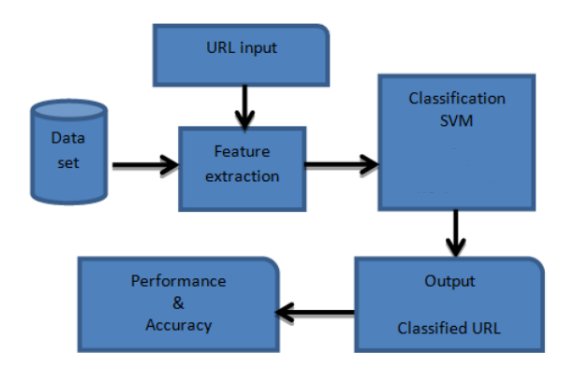

##<font color='#e3a3b2'>**1. Import libraries needed:**

In [ ]:
!pip install tld

In [ ]:
#libraries needed
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold  # For validation

##<font color='#e3a3b2'>**2. Import the dataset:**

In [ ]:
#Load Dataset
df=pd.read_csv('malicious_phish.csv')
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


##<font color='#e3a3b2'>**3. Dataset exploration:**

-  **Dataset description:**

  We have collected a huge dataset of **651,191 URLs**, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. As we know one of the most crucial tasks is to curate the dataset for a machine learning project. We have curated this dataset from five different sources.
  
  For collecting benign, phishing, malware and defacement URLs we have used URL dataset (ISCX-URL-2016) For increasing phishing and malware URLs, we have used Malware domain black list dataset. We have increased benign URLs using faizan git repo At last, we have increased more number of phishing URLs using Phishtank dataset and PhishStorm dataset As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.

In [ ]:
# informations about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
#description of the dataset
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [ ]:
#Checking the NaN values
df.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

##<font color='#e3a3b2'>**3. Data Pre-Processing & Feature Extraction:**


▶ This function checks whether a given URL string (url) contains an IP address. It returns:


- "1": If an IP address (IPv4 or IPv6) is found in the URL.
- "0": If no IP address is found in the URL.

In [ ]:
#Whether IP is part of domain or not.
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
#new column use_of_ip
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

<Axes: xlabel='use_of_ip', ylabel='Count'>

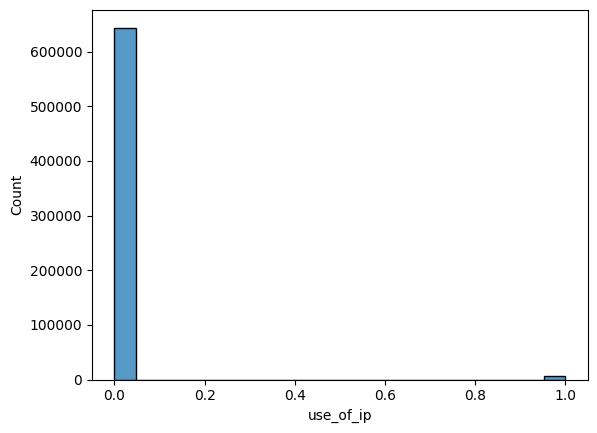

In [ ]:
sns.histplot(df["use_of_ip"])

In [ ]:
df.head()

,url,type,use_of_ip
0,br-icloud.com.br,phishing,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0


▶ This function aims to identify potentially abnormal URLs based on the hostname. It returns:

- "1": If the extracted hostname is found within the URL (excluding the protocol like http/https).
- "0": If the extracted hostname isn't found within the URL.

In [ ]:
#whether the url is normal or not from the hostname
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0
#new column abnormal_url
df["abnormal_url"] = df["url"].apply(lambda i: abnormal_url(i))

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1


<Axes: xlabel='abnormal_url', ylabel='Count'>

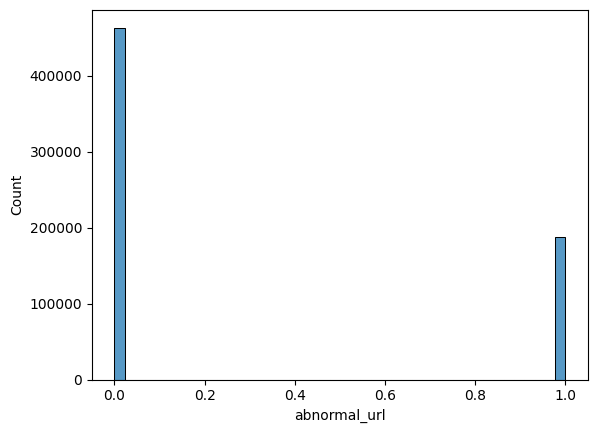

In [ ]:
sns.histplot(df["abnormal_url"])


⬇  The code you provided below creates several new columns in your dataframe df that capture various characteristics of the URLs present in the url column.

▶ We check the lexical features used in the process. The most commonly
considered lexical features are the length of URL, each URL component length, count of the
presence of special characters and many more. The string is taken in such manner that each part
demarcated by any special character (e.g. '.', '/', '=', '?', ...) forming a word. Depending upon the
various sort of words in all the strings of URLs, a dictionary has to be made where each word
was an attribute. Based on if the word is present in the URL, the feature would be valued 1 if
present or 0 otherwise, also called the bag-of-words figure.

In [ ]:
#new column counts the number of points in the url
df["count."] = df["url"].apply(lambda i: i.count("."))
#new column counts the number of 'www' in the url
df["count-www"] = df["url"].apply(lambda i: i.count("www"))
#new column counts the number of '@' in the url
df["count@"] = df["url"].apply(lambda i: i.count("@"))
#new column counts the number of 'https' in the url
df["count-https"] = df["url"].apply(lambda i: i.count("https"))
#new column counts the number of 'http' in the url
df["count-http"] = df["url"].apply(lambda i: i.count("http"))
#new column counts the number of '%' in the url
df["count%"] = df["url"].apply(lambda i: i.count("%"))
#new column counts the number of '?' in the url
df["count?"] = df["url"].apply(lambda i: i.count("?"))
#new column counts the number of '-' in the url
df["count-"] = df["url"].apply(lambda i: i.count("-"))
#new column counts the number of '=' in the url
df["count="] = df["url"].apply(lambda i: i.count("="))
#new column calculates the length of the url
df["url_length"] = df["url"].apply(lambda i: len(str(i)))
#new column calculates the length of the hostname
df["hostname_length"] = df["url"].apply(lambda i: len(urlparse(i).netloc))

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count("/")
# new column calculates the number of directory in the url
df["count_dir"] = df["url"].apply(lambda i: no_of_dir(i))

In [ ]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count("//")
# new column calculates the number of the embed domain in the url
df["count_embed_domain"] = df["url"].apply(lambda i: no_of_embed(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
# new column generates a short url
df["short_url"] = df["url"].apply(lambda i: shortening_service(i))

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
# new column calculates the number of the suspicious words in the url
df["sus_url"] = df["url"].apply(lambda i: suspicious_words(i))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits
#new column counts the number of the digits in the url
df["count-digits"] = df["url"].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters
#new column counts the number of the letters in the url
df["count-letters"] = df["url"].apply(lambda i: letter_count(i))

In [ ]:
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split("/")[1])
    except:
        return 0
#new column calculates the length of the first element of the URL path ( the part after the domain name)
df["fd_length"] = df["url"].apply(lambda i: fd_length(i))

In [ ]:
#new column extracts the last part of a URL address after the last period.
df["tld"] = df["url"].apply(lambda i: get_tld(i, fail_silently = True))


▶ This function takes a string argument **tld** (presumably representing the Top-Level Domain extracted from a URL). It returns:

- The length of the TLD string:  (e.g., 3 for "com") if the extraction was successful.
-1 : if there's an exception during processing (e.g., the tld argument might be empty or not a string).

In [ ]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
#new column calculates the length of tld is exists
df["tld_length"] = df["tld"].apply(lambda i: tld_length(i))

In [ ]:
#drop the column tld
df = df.drop("tld", 1)

<ipython-input-24-fc8ac7193982>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld", 1)


▶ Numericat to Categorical encoding Function:


In [ ]:
  #the part of the encoding
  # Binary Label
df['binary_label'] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)

##<font color='#e3a3b2'>**4. Model Construction & Training:**



 ### **Split Data:**


In [ ]:
X=df.drop(columns=['binary_label', 'type', 'url']) # Features extracted from URLs
y=df['binary_label']

* This code splits the data:
   * 80% for training (X_train, y_train).
   * 20% for testing and validation (X_test_val, y_test_val).

* We further split the testing/validation set (20% of the data) into separate testing (X_test, y_test) and validation sets (X_val, y_val) using StratifiedKFold. This ensures the proportions of malicious and benign URLs are preserved in each set.

In [ ]:
# Splitting data into training, testing, and validation sets (adjust test_size and val_size as needed)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split testing data into testing and validation sets using StratifiedKFold
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

In [ ]:
len(X_train)

520952

### **Train the SVM model:**

* Create an SVC (Support Vector Classifier) model with a linear kernel (you can experiment with other kernels like rbf).
* Train the model on the pre-processed training data (X_train, y_train).

In [ ]:
X_train=X_train[0:50000]
y_train=y_train[0:50000]

In [ ]:
model = SVC(kernel="linear")  # You can experiment with different kernels
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#model2 = SVC(kernel='rbf', C=1.0)
#model2.fit(X_train, y_train)
#y_pred2 = model2.predict(X_test)

### **Evaluate Performance on Validation Set:**

Calculate evaluation metrics like accuracy, precision, recall, and F1 score on the validation set to assess the model's performance on unseen data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)

Validation Accuracy: 0.902718058968059
Validation Precision: 0.9067137447548869
Validation Recall: 0.7970401691331924
Validation F1 Score: 0.8483470184090203


### **Test on Final Testing Set:**

Finally, use the trained model to make predictions on the final testing set (X_test) and evaluate its performance using the chosen metrics

In [ ]:
y_pred_test = model.predict(X_test)
# Evaluate performance on the testing set using the same metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)

Validation Accuracy: 0.9010119934274174
Validation Precision: 0.906636438582028
Validation Recall: 0.7915429599640126
Validation F1 Score: 0.8451894903693741


### **RESULT :**
In this, we have shown how machine learning techniques help in the detection of the malicious
URLs on the basis of the feature set provided. Specifically, we explained the feature sets and
the method to classify the given features set for the detection of malicious URL.